<a href="https://colab.research.google.com/github/AngelB26/ML-AI/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings_data = pd.read_csv("/content/BX-Book-Ratings.csv",sep=";",error_bad_lines=False,encoding="latin-1")
ratings_data_copy = ratings_data.copy()

users_data = pd.read_csv("/content/BX-Users.csv",encoding="latin-1",sep=";",error_bad_lines=False)
users_data_copy = users_data.copy()

books_data = pd.read_csv("/content/BX-Books.csv",sep=";",encoding="latin-1",error_bad_lines=False,engine="python")
books_data_copy = books_data.copy()

<ipython-input-2-550aa67585f3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings_data = pd.read_csv("/content/BX-Book-Ratings.csv",sep=";",error_bad_lines=False,encoding="latin-1")
<ipython-input-2-550aa67585f3>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users_data = pd.read_csv("/content/BX-Users.csv",encoding="latin-1",sep=";",error_bad_lines=False)
<ipython-input-2-550aa67585f3>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_data = pd.read_csv("/content/BX-Books.csv",sep=";",encoding="latin-1",error_bad_lines=False,engine="python")
Skipping line 815: ';' expected after '"'
Skipping line 1679: ';' expected after '"'
Skipping line 2531: ';' expected after '"'
Skipping line 2640: ';' e

In [ ]:
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Changing column names to lowercase separated by '_'
books_data.columns = [x.lower().replace("-","_") for x in books_data.columns]

In [ ]:
books_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_data.shape

(230050, 8)

In [ ]:
books_data = books_data[['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher']]

In [ ]:
books_data.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
books_data.year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378])

Text(0.5, 1.0, 'NO NULL Values')

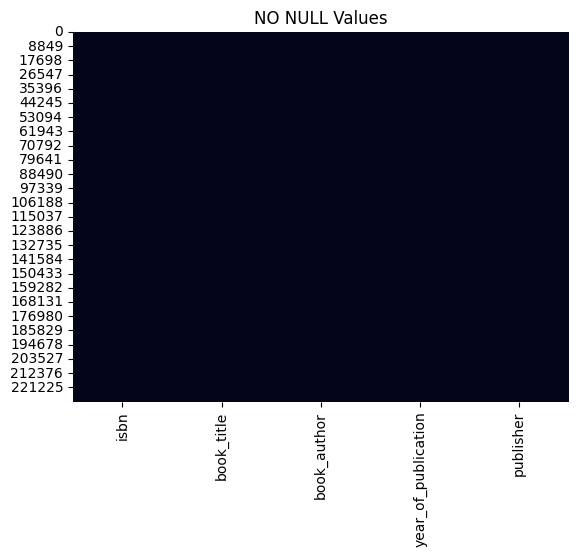

In [ ]:
sns.heatmap(books_data.isnull(), cbar=False)
plt.title("NO NULL Values")

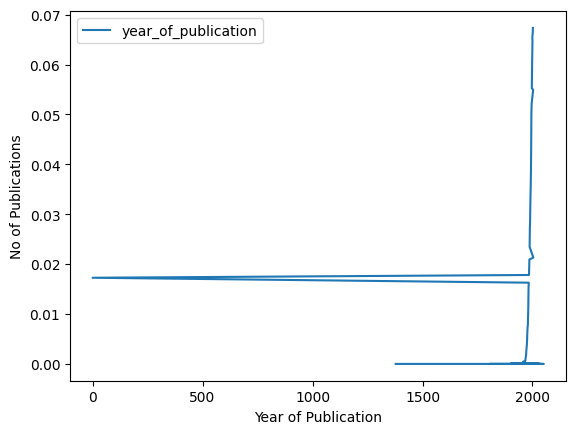

In [ ]:
books_data.year_of_publication.value_counts(normalize=True).plot()
plt.xlabel("Year of Publication")
plt.ylabel("No of Publications")
plt.legend()

In [ ]:
books_data.info()
books_data.year_of_publication = books_data.year_of_publication.astype('int32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230050 entries, 0 to 230049
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 230050 non-null  object
 1   book_title           230050 non-null  object
 2   book_author          230049 non-null  object
 3   year_of_publication  230050 non-null  int64 
 4   publisher            230048 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.8+ MB


In [ ]:
books_data.year_of_publication.sort_values().unique()

array([   0, 1378, 1806, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910,
       1911, 1914, 1917, 1920, 1921, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2008, 2010, 2011, 2012, 2020, 2021, 2026, 2030, 2038, 2050],
      dtype=int32)

In [ ]:
#We can see, some values are 0 and some are future values (1376, 1378, 2024, 2026, 2030, 2037, 2038, 2050). We can remove them
books_data = books_data[~books_data.year_of_publication.isin([0, 1376, 1378, 2024, 2026, 2030, 2037, 2038, 2050])]

In [ ]:
books_data.year_of_publication.sort_values().unique()

array([1806, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914,
       1917, 1920, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008,
       2010, 2011, 2012, 2020, 2021], dtype=int32)

In [ ]:
hist_data = books_data.year_of_publication.value_counts(normalize=True)

Text(0, 0.5, 'Publications %')

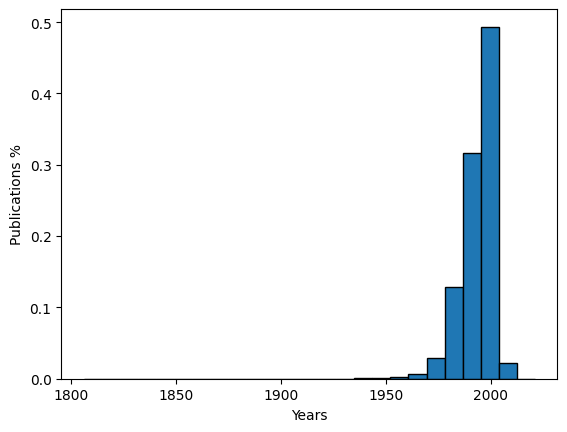

In [ ]:
plt.hist(x=hist_data.index, weights=hist_data.values, bins=25, edgecolor='black')
plt.xlabel("Years")
plt.ylabel("Publications %")

In [ ]:
books_data.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
#checking missing values
books_data.book_title.isna().sum()

0

In [ ]:
#ratings_data

Text(0.5, 1.0, 'No Null Values')

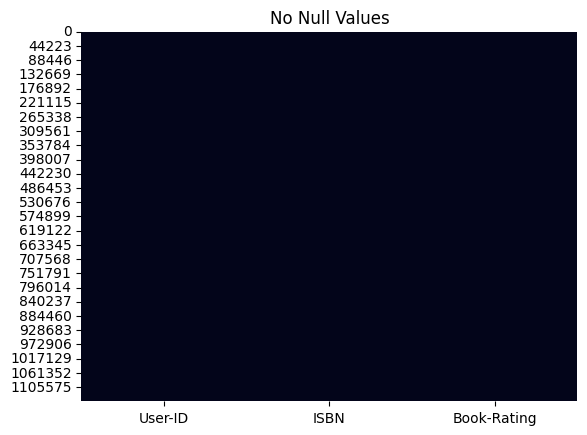

In [ ]:
sns.heatmap(ratings_data.isnull(), cbar=False)
plt.title("No Null Values")

In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_data.columns = [x.lower().replace("-","_") for x in ratings_data.columns]

In [ ]:
ratings_data.sort_values(by=["user_id"])

,user_id,isbn,book_rating
9561,2,0195153448,0
9562,7,034542252,0
9572,8,0771025661,0
9580,8,1881320189,7
9579,8,1575663937,6
...,...,...,...
9560,278854,0553579606,8
9554,278854,0375703063,7
9553,278854,0316184152,7
9555,278854,042516098X,7


In [ ]:
#users_data

In [ ]:
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_data.columns = [x.lower().replace("-","_") for x in users_data.columns]

In [ ]:
users_data.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_data.shape

(278858, 3)

Text(0.5, 1.0, 'Null Values')

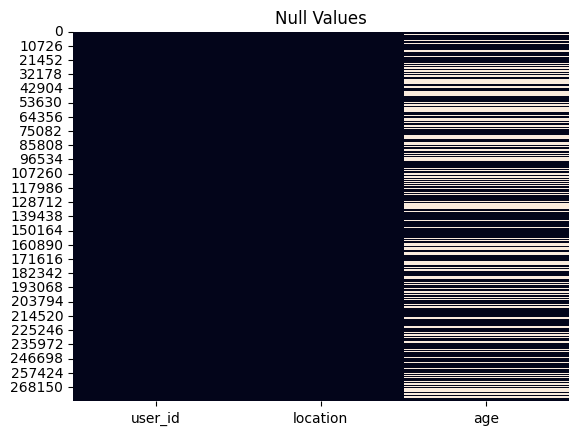

In [ ]:
sns.heatmap(users_data.isnull(), cbar=False)
plt.title("Null Values")

In [ ]:
users_data.age.isna().sum()
#there are so many missing values so we can drop it

110762

In [ ]:
users_data.drop(columns=["age"], inplace=True)

**Data Merge**

In [ ]:
#merging books_data and ratings_data
data= pd.merge(books_data,ratings_data,on='isbn')

In [ ]:
data.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [ ]:
data= pd.merge(data, users_data, on='user_id')

In [ ]:
data.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada"
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada"
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada"
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada"


In [ ]:
def split_country(x):
    return x.split(",")[-1].strip()

In [ ]:
data["country"] = data.location.apply(split_country)

In [ ]:
data.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",canada


In [ ]:
data.country.value_counts()

usa               710110
canada             86643
united kingdom     29122
germany            25382
                   23312
                   ...  
c                      1
samoa                  1
senegal                1
x                      1
l`italia               1
Name: country, Length: 283, dtype: int64

Calculating total ratings for each book

In [ ]:
rating_data = data.groupby(by = ['book_title'])['book_rating'].sum().sort_values(ascending=False).reset_index()

In [ ]:
rating_of_books_df = pd.DataFrame(rating_data)

In [ ]:
rating_of_books_df.rename(columns={'book_rating':'total_rating'}, inplace=True)
rating_of_books_df

,book_title,total_rating
0,The Lovely Bones: A Novel,5787
1,The Da Vinci Code,4169
2,The Secret Life of Bees,3432
3,The Red Tent (Bestselling Backlist),3134
4,The Nanny Diaries: A Novel,2923
...,...,...
202426,Sally Ride: Shooting for the Stars (Great Live...,0
202427,El Idioma Imposible: El Dia del Watusi (Litera...,0
202428,Sally Hemings : A Novel,0
202429,Sally Hemings,0


In [ ]:
final_book_df = data.merge(rating_of_books_df,left_on='book_title',right_on='book_title',how='left')

In [ ]:
final_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,country,total_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",usa,7
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",canada,69
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",canada,15
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",canada,47
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",canada,0


In [ ]:
rating_gt_100 = final_book_df.query('total_rating>=100')
rating_gt_100.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,country,total_rating
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,"timmins, ontario, canada",canada,932
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,8,0,"timmins, ontario, canada",canada,218
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,"ottawa, ontario, canada",canada,1957
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,"ottawa, ontario, canada",canada,2715
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,"ottawa, ontario, canada",canada,1671


In [ ]:
features = rating_gt_100.pivot_table(index='book_title',columns='user_id',values='book_rating').fillna(0)

In [ ]:
features.head()

user_id,8,9,14,16,17,19,23,26,32,39,...,278824,278828,278832,278836,278838,278843,278844,278846,278851,278854
book_title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#data converting to a matrix...converting it into csr matrix
from scipy.sparse import csr_matrix
books_features_matrix= csr_matrix(features.values)

Building nearest neighbour model(KNN)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(books_features_matrix)
query_index = np.random.choice(features.shape[0])
distances, indices = model.kneighbors(features.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(features.index[86]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A Patchwork Planet:

1: Keeper of the Heart, with distance of 0.6778520446282885:
2: Forever... : A Novel of Good and Evil, Love and Hope, with distance of 0.7068026097891236:
3: Until You, with distance of 0.7299059413570914:
4: When the Storm Breaks, with distance of 0.7360619341244856:
5: Purity in Death, with distance of 0.7474846267796919:


Building using MF

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(books_features_matrix)
matrix.shape

(3841, 12)

In [ ]:
# Create a nearest neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Get recommendations for a user
user_id=123
distances, indices = model.kneighbors(matrix[user_id,:].reshape(1, -1), n_neighbors=6)

In [ ]:
# Print the recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for user {0}:\n'.format(user_id))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for user 123:

1: Mythology, with distance of 0.0031255118043401753:
2: Losing Julia, with distance of 0.0031314036795851985:
3: The Beans of Egypt, Maine, with distance of 0.0034324897768067686:
4: The Plague Tales, with distance of 0.0036823682846738315:
5: 14,000 Things to Be Happy About, with distance of 0.004165753722014998:
